<a href="https://colab.research.google.com/github/irfanShaik317/Speech-Emotion-Detection-Using-Deep-Learning-and-Audio-Signal-Processing/blob/main/speech_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
Ravdess = "/content/speech-emotion-recognition-ravdess-data.zip"

In [ ]:
import zipfile
import os

Ravdess = "/content/speech-emotion-recognition-ravdess-data.zip"

extract_dir = "/content/ravdess_data"

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(Ravdess, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

ravdess_directory_list = os.listdir(extract_dir)



In [ ]:

ravdess_directory_list = os.listdir(extract_dir)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:

    actor = os.listdir(os.path.join(extract_dir, dir))
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')

        file_emotion.append(int(part[2]))

        file_path.append(os.path.join(extract_dir, dir, file))


emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

<ipython-input-40-f13a99942b6b>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


,Emotions,Path
0,sad,/content/ravdess_data/Actor_07/03-01-04-01-01-...
1,happy,/content/ravdess_data/Actor_07/03-01-03-01-02-...
2,happy,/content/ravdess_data/Actor_07/03-01-03-02-01-...
3,neutral,/content/ravdess_data/Actor_07/03-01-01-01-02-...
4,calm,/content/ravdess_data/Actor_07/03-01-02-02-01-...


In [ ]:
import kagglehub
import os

path = kagglehub.dataset_download("ejlok1/cremad")

Crema = os.path.join(path, 'AudioWAV')  # Update Crema with the correct path

print("Path to dataset files:", path)

# Now you can list the directory
crema_directory_list = os.listdir(Crema)



Path to dataset files: /root/.cache/kagglehub/datasets/ejlok1/cremad/versions/1


In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,happy,/root/.cache/kagglehub/datasets/ejlok1/cremad/...
1,neutral,/root/.cache/kagglehub/datasets/ejlok1/cremad/...
2,angry,/root/.cache/kagglehub/datasets/ejlok1/cremad/...
3,sad,/root/.cache/kagglehub/datasets/ejlok1/cremad/...
4,angry,/root/.cache/kagglehub/datasets/ejlok1/cremad/...


In [ ]:
import kagglehub


path = kagglehub.dataset_download("ejlok1/surrey-audiovisual-expressed-emotion-savee")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee/versions/1


In [ ]:
import kagglehub
import os

path = kagglehub.dataset_download("ejlok1/surrey-audiovisual-expressed-emotion-savee")

# Assuming the audio files are in a subdirectory named 'ALL'
# Update Savee with the correct path
Savee = os.path.join(path, 'ALL')

print("Path to dataset files:", Savee)  # Print the updated Savee path

savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    # Use os.path.join to construct the full file path
    file_path.append(os.path.join(Savee, file))
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee/versions/1/ALL


,Emotions,Path
0,neutral,/root/.cache/kagglehub/datasets/ejlok1/surrey-...
1,surprise,/root/.cache/kagglehub/datasets/ejlok1/surrey-...
2,neutral,/root/.cache/kagglehub/datasets/ejlok1/surrey-...
3,angry,/root/.cache/kagglehub/datasets/ejlok1/surrey-...
4,angry,/root/.cache/kagglehub/datasets/ejlok1/surrey-...


In [ ]:
data_path = pd.concat([Ravdess_df, Crema_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,sad,/content/ravdess_data/Actor_07/03-01-04-01-01-...
1,happy,/content/ravdess_data/Actor_07/03-01-03-01-02-...
2,happy,/content/ravdess_data/Actor_07/03-01-03-02-01-...
3,neutral,/content/ravdess_data/Actor_07/03-01-01-01-02-...
4,calm,/content/ravdess_data/Actor_07/03-01-02-02-01-...


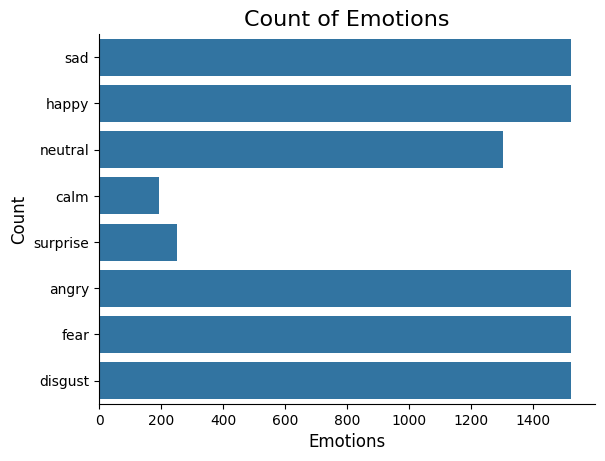

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)

    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):

    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

    plt.colorbar()

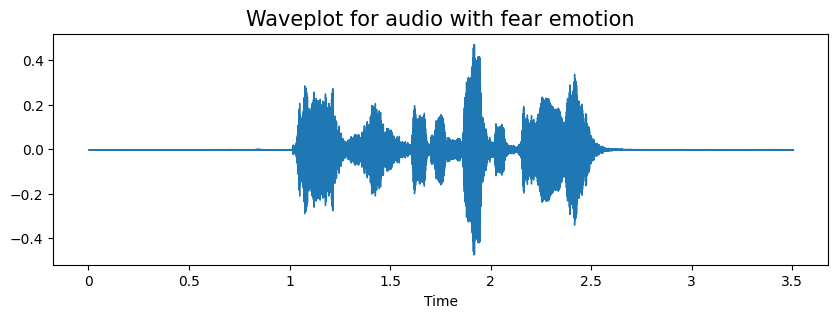

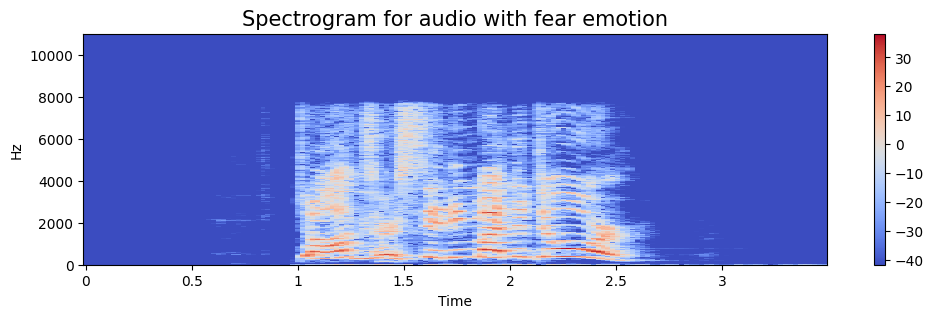

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

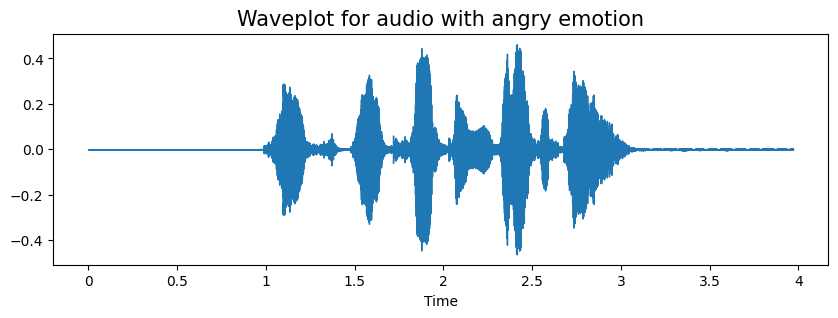

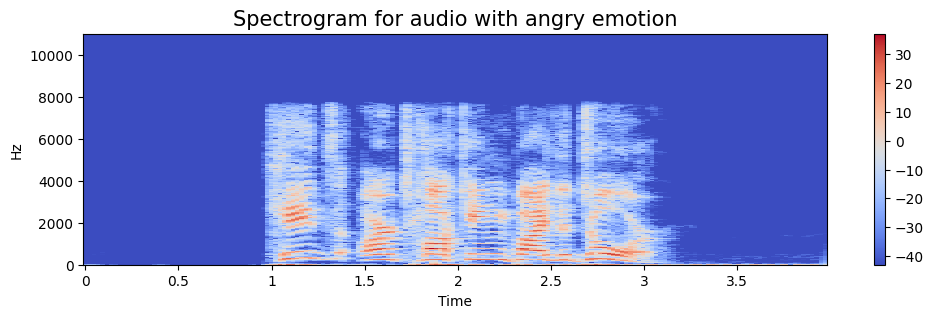

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

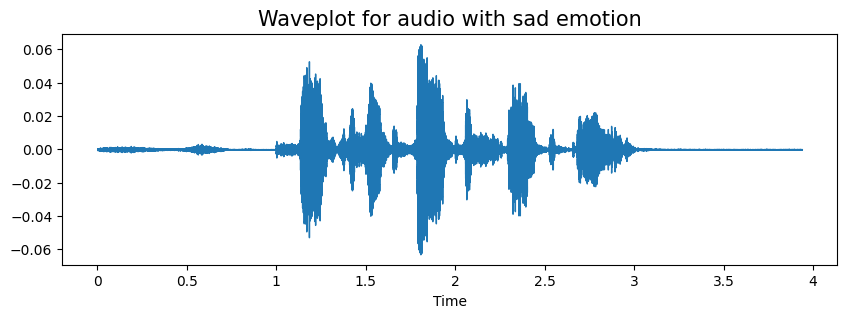

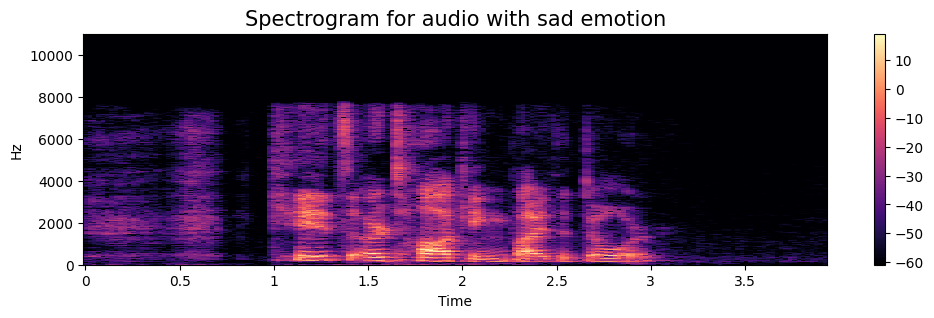

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

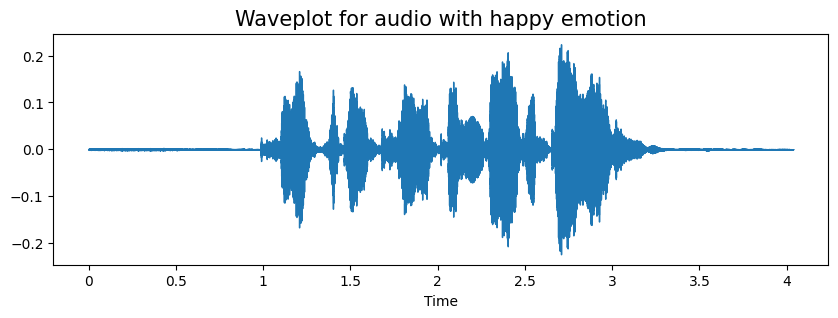

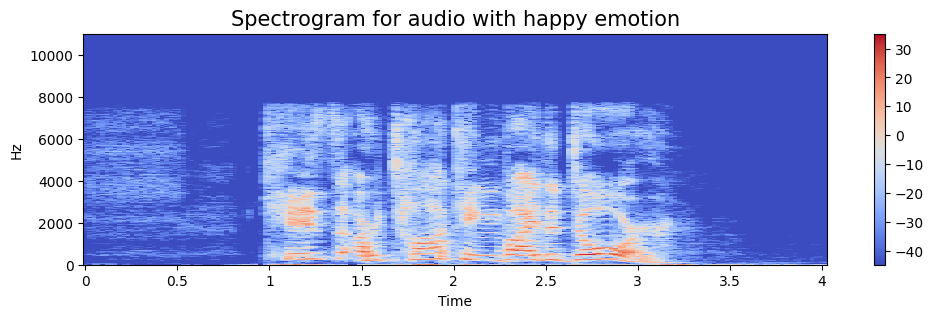

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

DATA **AUGUMENTAION**

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

SAMPLE AUDIO


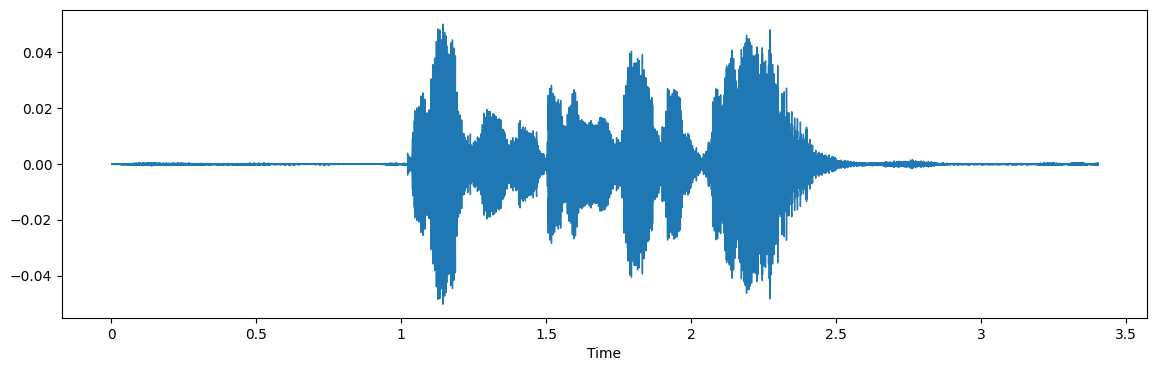

In [ ]:
plt.figure(figsize=(14,4))

librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

INJECTING NOISE

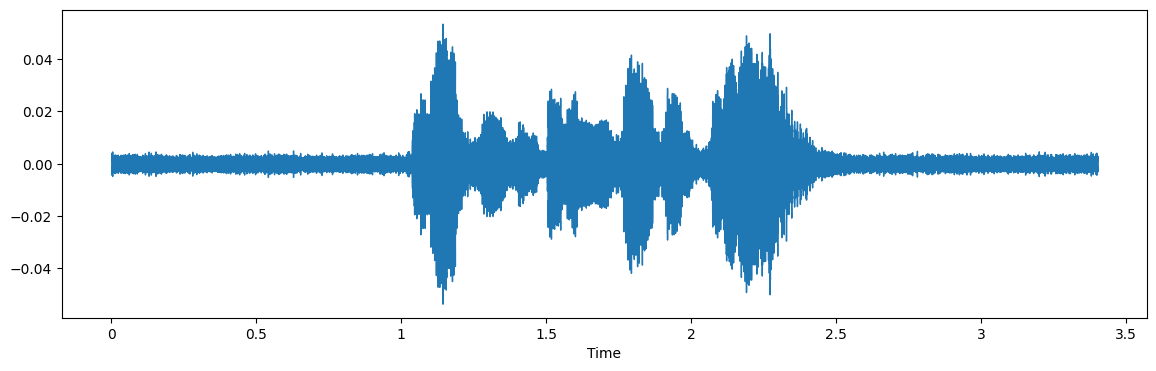

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))

librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

STRETCHING

In [ ]:
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

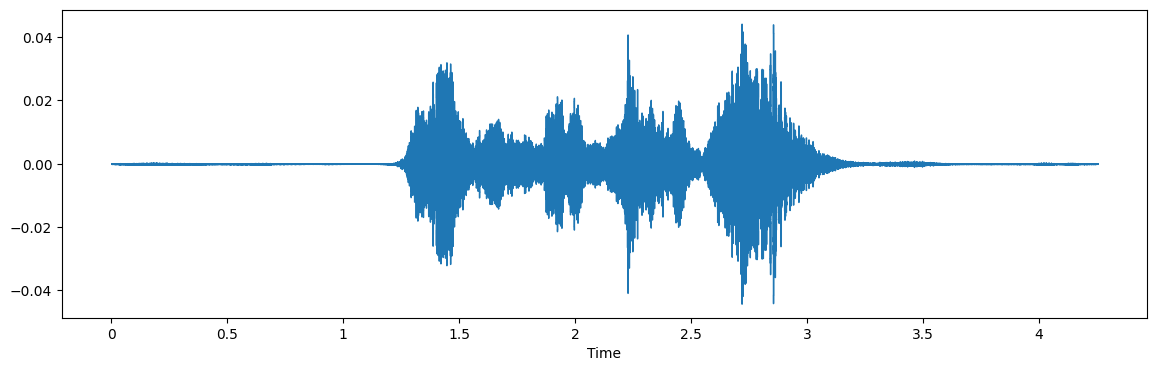

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))

librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

SHIFTING

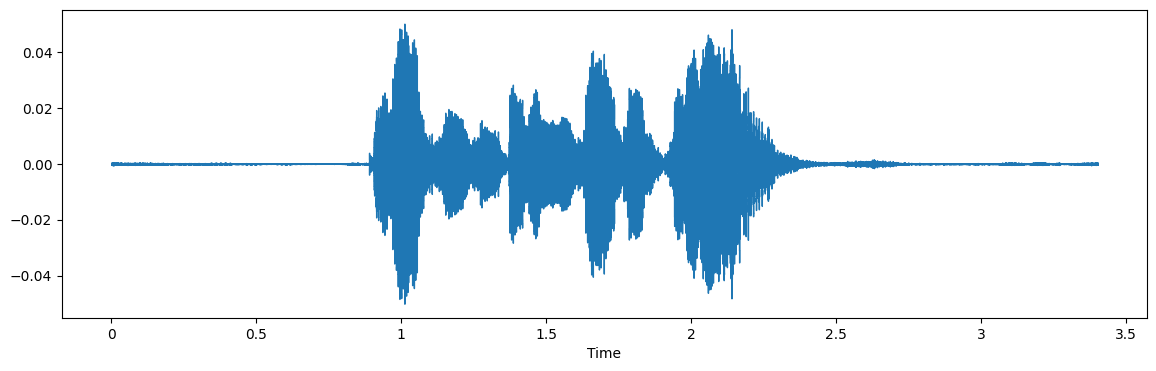

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))

librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
def pitch(data, sampling_rate, pitch_factor=0.7):
    n_steps = pitch_factor * 12
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=n_steps)

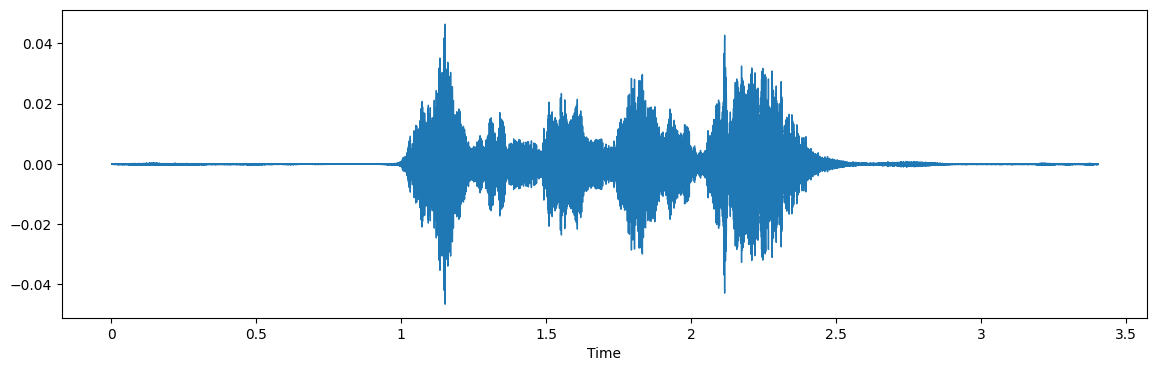

In [ ]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):

    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)

        Y.append(emotion)

<ipython-input-66-6f671650d433>:28: UserWarning: PySoundFile failed. Trying audioread instead.
  data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/ejlok1/cremad/versions/1/AudioWAV1049_ITH_HAP_XX.wav'

In [ ]:
len(X), len(Y), data_path.Path.shape

(4320, 4320, (9362,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.155296,0.622425,0.589473,0.546703,0.596189,0.619703,0.583334,0.604451,0.678709,0.707112,...,1.474935e-12,1.367786e-12,1.290898e-12,1.233028e-12,1.189546e-12,1.158009e-12,1.135032e-12,1.120038e-12,1.110633e-12,sad
1,0.218718,0.672293,0.661900,0.644418,0.694020,0.693323,0.603369,0.601821,0.673937,0.692492,...,1.574824e-06,1.513376e-06,1.638872e-06,1.555865e-06,1.598560e-06,1.595689e-06,1.565120e-06,1.585600e-06,1.521065e-06,sad
2,0.137952,0.590792,0.581427,0.540453,0.593081,0.643365,0.634457,0.664271,0.691099,0.684549,...,1.112142e-06,2.003693e-06,2.668699e-06,2.457507e-06,3.317081e-06,3.065803e-06,1.258262e-06,1.854470e-07,7.745083e-09,sad
3,0.160102,0.717492,0.696973,0.591549,0.652490,0.687231,0.710355,0.701493,0.646125,0.657052,...,6.248269e-14,5.559222e-14,5.125017e-14,4.832492e-14,4.631996e-14,4.505933e-14,4.443424e-14,4.429798e-14,4.365669e-14,happy
4,0.287788,0.750401,0.815991,0.741954,0.761521,0.812267,0.778220,0.741690,0.705305,0.657442,...,1.493296e-04,1.428169e-04,1.526234e-04,1.497386e-04,1.452342e-04,1.485220e-04,1.435806e-04,1.465740e-04,1.528124e-04,happy


In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162, 1), (3240, 8), (1080, 162, 1), (1080, 8))

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 162, 256)            │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 81, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 81, 256)             │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 41, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 41, 128)             │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 21, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          22,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 467ms/step - accuracy: 0.6710 - loss: 0.8943 - val_accuracy: 0.5102 - val_loss: 1.4068 - learning_rate: 0.0010
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 423ms/step - accuracy: 0.6666 - loss: 0.8609 - val_accuracy: 0.5176 - val_loss: 1.3565 - learning_rate: 0.0010
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 423ms/step - accuracy: 0.6656 - loss: 0.8729 - val_accuracy: 0.5231 - val_loss: 1.3799 - learning_rate: 0.0010
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 479ms/step - accuracy: 0.6921 - loss: 0.8429 - val_accuracy: 0.5324 - val_loss: 1.5102 - learning_rate: 0.0010
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 42s 492ms/step - accuracy: 0.6952 - loss: 0.8032 - val_accuracy: 0.5167 - val_loss: 1.4218 - learning_rate: 0.0010
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 443ms/step - accuracy: 0.7106 - loss: 0.7996 - val_accuracy: 0.5324 - val_loss: 1.3635 - learning_rate: 0.0010
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 40s 431ms/step - accuracy: 0.6885 - loss: 0.

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5850 - loss: 1.9782
Accuracy of our model on test data :  58.24074149131775 %


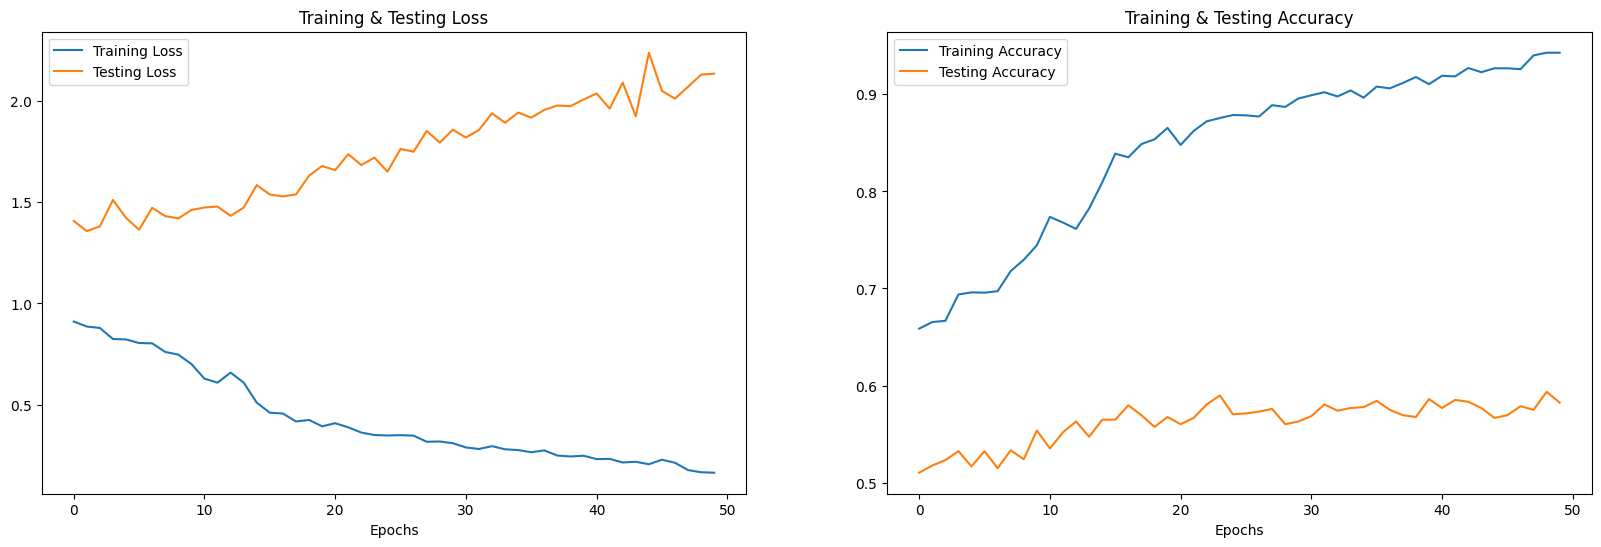

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,fear,fear
1,happy,happy
2,calm,neutral
3,sad,sad
4,neutral,sad
5,calm,calm
6,surprise,surprise
7,angry,angry
8,happy,sad
9,disgust,surprise


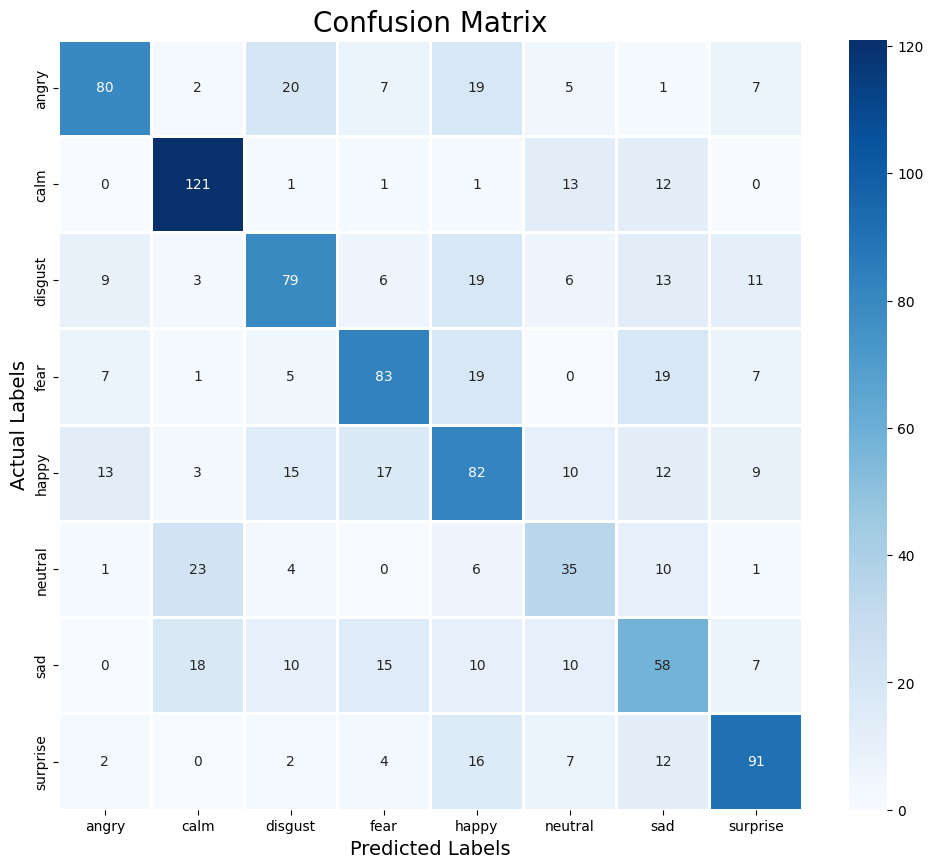

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.71      0.57      0.63       141
        calm       0.71      0.81      0.76       149
     disgust       0.58      0.54      0.56       146
        fear       0.62      0.59      0.61       141
       happy       0.48      0.51      0.49       161
     neutral       0.41      0.44      0.42        80
         sad       0.42      0.45      0.44       128
    surprise       0.68      0.68      0.68       134

    accuracy                           0.58      1080
   macro avg       0.58      0.57      0.57      1080
weighted avg       0.59      0.58      0.58      1080

